<a href="https://colab.research.google.com/github/arianza1210/ComputerVision/blob/main/Kapsel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dir = os.path.join('/content/drive/MyDrive/Dataset CNN/Spliting Data/train')
validation_dir = os.path.join('/content/drive/MyDrive/Dataset CNN/Spliting Data/valid')

In [ ]:
train_batik_dir = os.path.join(train_dir, 'kupu_batik_cap')  # directory with our training mendoan pictures
train_harimau_dir = os.path.join(train_dir, 'kupu_harimau_kuning_hijau')  # directory with our training sate ayam pictures
train_hijau_dir = os.path.join(train_dir, 'kupu_hijau_biru')  # directory with our training soto ayam pictures
train_jarak_dir = os.path.join(train_dir, 'kupu_jarak')  # directory with our training mendoan pictures
train_jojo_dir = os.path.join(train_dir, 'kupu_jojo')  # directory with our training sate ayam pictures
train_pantat_dir = os.path.join(train_dir, 'kupu_pantat_merah')  # directory with our training soto ayam pictures
train_helena_dir = os.path.join(train_dir, 'kupu_raja_helena')  # directory with our training mendoan pictures
train_limau_dir = os.path.join(train_dir, 'kupu_raja_limau')  # directory with our training sate ayam pictures


validation_batik_dir = os.path.join(validation_dir, 'kupu_batik_cap')  # directory with our validation mendoan pictures
validation_harimau_dir = os.path.join(validation_dir, 'kupu_harimau_kuning_hijau')  # directory with our validation sate ayam pictures
validation_hijau_dir = os.path.join(validation_dir, 'kupu_hijau_biru')  # directory with our validation soto ayam pictures
validation_jarak_dir = os.path.join(validation_dir, 'kupu_jarak')  # directory with our validation mendoan pictures
validation_jojo_dir = os.path.join(validation_dir, 'kupu_jojo')  # directory with our validation sate ayam pictures
validation_pantat_dir = os.path.join(validation_dir, 'kupu_pantat_merah')  # directory with our validation soto ayam pictures
validation_helena_dir = os.path.join(validation_dir, 'kupu_raja_helena')  # directory with our validation mendoan pictures
validation_limau_dir = os.path.join(validation_dir, 'kupu_raja_limau')  # directory with our validation sate ayam pictures

In [ ]:
num_batik_tr = len(os.listdir(train_batik_dir))
num_harimau_tr = len(os.listdir(train_harimau_dir))
num_hijau_tr = len(os.listdir(train_hijau_dir))
num_jarak_tr = len(os.listdir(train_jarak_dir))
num_jojo_tr = len(os.listdir(train_jojo_dir))
num_pantat_tr = len(os.listdir(train_pantat_dir))
num_helena_tr = len(os.listdir(train_helena_dir))
num_limau_tr = len(os.listdir(train_limau_dir))

num_batik_val = len(os.listdir(validation_batik_dir))
num_harimau_val = len(os.listdir(validation_harimau_dir))
num_hijau_val = len(os.listdir(validation_hijau_dir))
num_jarak_val = len(os.listdir(validation_jarak_dir))
num_jojo_val = len(os.listdir(validation_jojo_dir))
num_pantat_val = len(os.listdir(validation_pantat_dir))
num_helena_val = len(os.listdir(validation_helena_dir))
num_limau_val = len(os.listdir(validation_limau_dir))

total_train = num_batik_tr + num_harimau_tr + num_hijau_tr + num_jarak_tr + num_jojo_tr + num_pantat_tr + num_helena_tr + num_limau_tr 
total_val = num_batik_val + num_harimau_val + num_hijau_val + num_jarak_val + num_jojo_val + num_pantat_val + num_helena_val + num_limau_val

In [ ]:
print('total training Batik images:', num_batik_tr)
print('total training Harimau images:', num_harimau_tr)
print('total training Hijau images:', num_hijau_tr)
print('total training Jarak images:', num_jarak_tr)
print('total training Jojo images:', num_jojo_tr)
print('total training Pantat images:', num_pantat_tr)
print('total training Helena images:', num_helena_tr)
print('total training Limau images:', num_limau_tr)

print('total validation Batik images:', num_batik_val)
print('total validation Harimau images:', num_harimau_val)
print('total validation Hijau images:', num_hijau_val)
print('total validation Jarak images:', num_jarak_val)
print('total validation Jojo images:', num_jojo_val)
print('total validation Pantat images:', num_pantat_val)
print('total validation Helena images:', num_helena_val)
print('total validation Limau images:', num_limau_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

In [ ]:
# Hyperparameter 1

batch_size = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical')

In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='categorical')

In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()    

In [ ]:
plotImages(sample_training_images[:5])

In [9]:
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
# Hyperparameter 2

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),

    MaxPooling2D(),
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    # Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),

    Dense(8, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Hyperparameter 3
epochs = 10

In [ ]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen,batch_size=32
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model_json=model.to_json()
with open("/content/drive/MyDrive/Dataset CNN/model.json","w") as file:
    file.write(model_json)
model.save_weights("/content/drive/MyDrive/Dataset CNN/model.h5")
print("Model berhasil disimpan !! ")

In [3]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/drive/MyDrive/Dataset CNN/model.json','r')
loaded_model_json = json_file.read()
json_file.close()

load_model = model_from_json(loaded_model_json)
load_model.load_weights("/content/drive/MyDrive/Dataset CNN/model.h5")

print("Loadded!")

Loadded!


In [4]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

prediksinya adalah jenis :  [[0. 0. 1. 0. 0. 0. 0. 0.]]


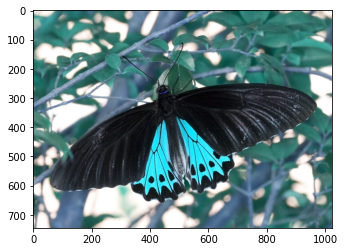

In [24]:
import numpy as np
import cv2

image = cv2.imread("/content/drive/MyDrive/Dataset CNN/Testing/gambar3.jpg")
imagecv = cv2.resize(image,(150,150))
imagecv = np.reshape(imagecv,[1,150,150,3])
prediksi = load_model.predict(imagecv)
print ("prediksinya adalah jenis : ",prediksi)
plt.imshow(image)
plt.show()